In [21]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
tf.__version__

'2.3.0'

In [3]:
import os
os.chdir('F:/Sandeep/SANDEEP DOCS/DLCVNLP/AirQualityUCI')

In [4]:
df = pd.read_csv('AirQualityUCI.csv')

In [5]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis = 1,inplace = True)

In [6]:
df1 = df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
df.shape

(9357, 15)

In [18]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [9]:
X = df.drop(['AH','Date','Time'],axis =1)
y = df['AH']

In [39]:
y

0       0.7578
1       0.7255
2       0.7502
3       0.7867
4       0.7888
         ...  
9352    0.7568
9353    0.7119
9354    0.6406
9355    0.5139
9356    0.5028
Name: AH, Length: 9357, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_trainfull,X_test,y_traifull,y_test = train_test_split(X,y,random_state = 2, test_size=0.33)

In [12]:
X_train,X_valid,y_train,y_valid = train_test_split(X_trainfull,y_traifull,random_state = 2, test_size=0.33)

In [31]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
layers = [(tf.keras.layers.Dense(30,activation = "relu",name ="input_layer",input_shape = X_train.shape[1:])),
          (tf.keras.layers.Dense(15,activation = "relu",name = "hidden_lay1")),
          (tf.keras.layers.Dense(18,activation = "relu",name = "hidden_lay2")),
          (tf.keras.layers.Dense(10,activation = "relu",name = "hidden_lay3")),
          (tf.keras.layers.Dense(1))
          
          
        ]

In [45]:
model = tf.keras.models.Sequential(layers)

In [64]:
model.compile(loss="mse", optimizer="Adam")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Epoch 1/15
132/132 [==============================] - 3s 20ms/step - loss: 0.0512 - val_loss: 0.0028
Epoch 2/15
132/132 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0049
Epoch 3/15
132/132 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 4/15
132/132 [==============================] - 0s 1ms/step - loss: 0.1555 - val_loss: 0.0064
Epoch 5/15
132/132 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0061
Epoch 6/15
132/132 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 7/15
132/132 [==============================] - 1s 7ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 8/15
132/132 [==============================] - 1s 8ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/15
132/132 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.1311
Epoch 10/15
132/132 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.007

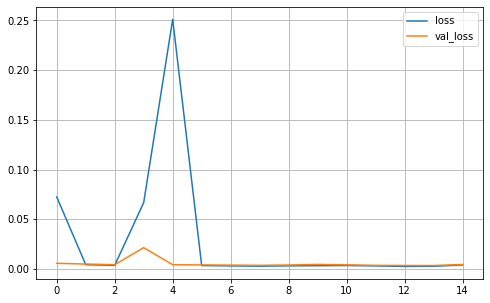

In [51]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [52]:
mse_test = model.evaluate(X_test, y_test)

97/97 [==============================] - 0s 567us/step - loss: 0.0040


In [69]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.7797775],
       [1.7251691],
       [1.5807862]], dtype=float32)

In [57]:
X_test[:3]

array([[ 0.49465099,  1.2265512 , -0.29693671,  0.43010162,  1.15672005,
         1.14353762, -0.94135191,  0.41178055,  1.06160127,  1.17163828,
         0.2803192 ,  0.56151062],
       [ 0.4600455 , -0.22552127, -0.29693671,  0.10993719, -0.16924748,
        -0.4693713 ,  0.19172768,  0.08082214,  0.41233695, -0.88755723,
         0.63140896, -0.20782688],
       [ 0.48696088,  0.61079895, -0.29693671,  0.36606874,  0.92983227,
         0.56833155, -0.62113376,  0.71909907,  0.86249355,  0.57734437,
         0.38164041,  0.17287622]])

In [63]:
y_test[:3]

5381    1.7699
3599    1.8037
4730    1.6256
Name: AH, dtype: float64